### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [1]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from math import sqrt
import random
np.random.seed(0)

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print('num of samples {}'.format(boston.data.shape[0]))
print('num of features {}'.format(boston.data.shape[1]))

num of samples 506
num of features 13


In [8]:
bosDF = pd.DataFrame(boston.data, columns= boston['feature_names'] )
bosDF['MEDV'] = pd.Series(boston.target)

bosDF.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f0dda50>]],
      dtype=object)

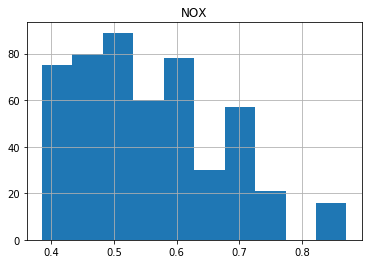

In [9]:
import matplotlib.pyplot as plt
bosDF.hist('NOX')

{'whiskers': [<matplotlib.lines.Line2D at 0x11f1a0810>,
 'caps': [<matplotlib.lines.Line2D at 0x11f1aae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f1a07d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11f1b08d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11f1b0dd0>],
 'means': []}

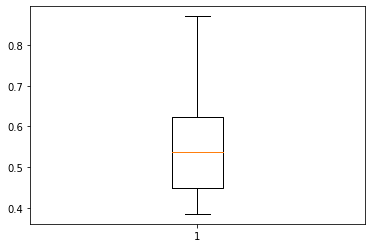

In [10]:
plt.boxplot(bosDF['NOX'])

we can see that 0.75 of the points are below 0.6** 
The Interquartile Range the represet 50% of the data is in small and also the lowest 25% are in small range that is close to the middle range but the data has long tail that contains the upper 25%. 

The data has positive skewness.


In [7]:
plt.figure(figsize=(12,10))
cor = bosDF.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 864x720 with 0 Axes>

In [11]:
correlated_features = set()

for col in cor.columns:
    
    cor_target = abs(cor[col])
    relevant_features = cor_target[cor_target>0.5]
    
    for (column_name, correlation_value) in zip(relevant_features.index, relevant_features):
        if column_name == col:
            continue
        
        key = tuple(sorted([col, column_name]))
        
        correlated_features.add((key, correlation_value))
    
correlated_features = sorted(correlated_features, key = lambda x: abs(x[1]), reverse = True)
correlated_features

[(('RAD', 'TAX'), 0.9102281885331822),
 (('DIS', 'NOX'), 0.7692301132258261),
 (('INDUS', 'NOX'), 0.7636514469209145),
 (('AGE', 'DIS'), 0.7478805408686316),
 (('LSTAT', 'MEDV'), 0.7376627261740143),
 (('AGE', 'NOX'), 0.7314701037859579),
 (('INDUS', 'TAX'), 0.7207601799515441),
 (('DIS', 'INDUS'), 0.7080269887427683),
 (('MEDV', 'RM'), 0.6953599470715389),
 (('NOX', 'TAX'), 0.6680232004030201),
 (('DIS', 'ZN'), 0.6644082227621132),
 (('AGE', 'INDUS'), 0.644778511355255),
 (('CRIM', 'RAD'), 0.6255051452626011),
 (('LSTAT', 'RM'), 0.6138082718663957),
 (('NOX', 'RAD'), 0.6114405634855754),
 (('INDUS', 'LSTAT'), 0.6037997164766213),
 (('AGE', 'LSTAT'), 0.6023385287262399),
 (('INDUS', 'RAD'), 0.5951292746038486),
 (('LSTAT', 'NOX'), 0.5908789208808449),
 (('CRIM', 'TAX'), 0.5827643120325845),
 (('AGE', 'ZN'), 0.5695373420992127),
 (('LSTAT', 'TAX'), 0.543993412001569),
 (('DIS', 'TAX'), 0.5344315844084561),
 (('INDUS', 'ZN'), 0.5338281863044747),
 (('NOX', 'ZN'), 0.5166037078279853),
 ((

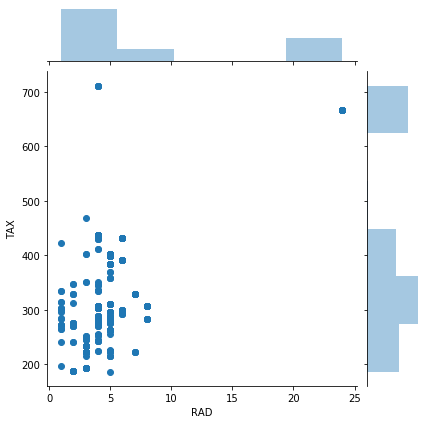

In [10]:
most_correlated = [cols for cols,_ in correlated_features[0:2]]

sns.jointplot(x=most_correlated[0][0], y=most_correlated[0][1], data=bosDF)


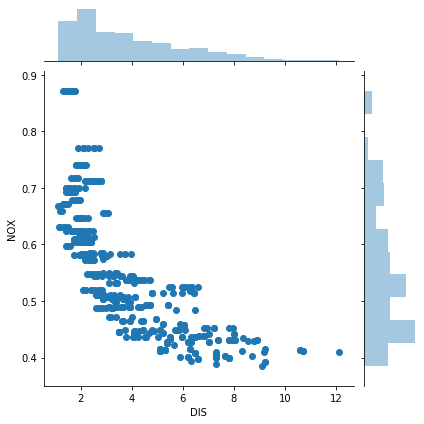

In [11]:
sns.jointplot(x=most_correlated[1][0], y=most_correlated[1][1], data=bosDF)

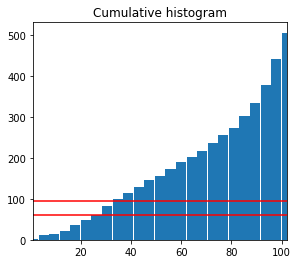

In [12]:
from scipy import stats
import numpy as np 

res = stats.cumfreq(bosDF['AGE'].tolist(), numbins=25)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,
                                 res.cumcount.size)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 2)

values = []
for val, count in zip(x,res.cumcount):
    for _ in range(int(count)):
        values.append(val)
        
ax1.bar(x, res.cumcount, width=res.binsize)
ax1.set_title('Cumulative histogram')
ax1.set_xlim([x.min(), x.max()])

xx1 = np.percentile(values, 25) 
xx3 = np.percentile(values, 75) 

plt.axhline(y=xx1, color='r', linestyle='-')
plt.axhline(y=xx3, color='r', linestyle='-')

plt.show()

In [17]:
bosDF.corr()['AGE']

CRIM       0.352734
ZN        -0.569537
INDUS      0.644779
CHAS       0.086518
NOX        0.731470
RM        -0.240265
AGE        1.000000
DIS       -0.747881
RAD        0.456022
TAX        0.506456
PTRATIO    0.261515
B         -0.273534
LSTAT      0.602339
MEDV      -0.376955
Name: AGE, dtype: float64

#1.6

# 1. DIS and INDUS have -0.7 correlation - the closer we are to employment centers the more retail business acres per town.

# 2. RAD has negative correlation with MEDV.

# 3. TAX and RAD have 0.9 correlation.

# 4. TAX and INDUS have 0.7 correlation.


In [28]:
bosDF[['AGE', 'MEDV', 'CRIM', 'RM', 'INDUS', 'DIS', 'RAD', 'TAX', 'LSTAT']].corr()

,AGE,MEDV,CRIM,RM,INDUS,DIS,RAD,TAX,LSTAT
AGE,1.000000,-0.376955,0.352734,-0.240265,0.644779,-0.747881,0.456022,0.506456,0.602339
MEDV,-0.376955,1.000000,-0.388305,0.695360,-0.483725,0.249929,-0.381626,-0.468536,-0.737663
CRIM,0.352734,-0.388305,1.000000,-0.219247,0.406583,-0.379670,0.625505,0.582764,0.455621
RM,-0.240265,0.695360,-0.219247,1.000000,-0.391676,0.205246,-0.209847,-0.292048,-0.613808
INDUS,0.644779,-0.483725,0.406583,-0.391676,1.000000,-0.708027,0.595129,0.720760,0.603800
DIS,-0.747881,0.249929,-0.379670,0.205246,-0.708027,1.000000,-0.494588,-0.534432,-0.496996
RAD,0.456022,-0.381626,0.625505,-0.209847,0.595129,-0.494588,1.000000,0.910228,0.488676
TAX,0.506456,-0.468536,0.582764,-0.292048,0.720760,-0.534432,0.910228,1.000000,0.543993
LSTAT,0.602339,-0.737663,0.455621,-0.613808,0.603800,-0.496996,0.488676,0.543993,1.000000


### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

### 2.A
No.
Proof:
$$If \space 𝐗 \space is \space multivariate  \space gaussian \space and  \space its \space elements \space are \space pairwise-independent –>  𝐶𝑜𝑣(𝑋𝑖,𝑋𝑗) = 0 for all 𝑖≠𝑗.\\
𝚺 \space is \space a \space diagonal \space matrix \space so \space \boldsymbol{\Sigma}^{-1} \space The \space 𝑖th \space diagonal \space element \space of \space \boldsymbol{\Sigma}^{-1} \space is \space 1/\sigma_i^2 \space where \space \sigma_i^2 = Var(X_i).\\
(\mathbf{x} - \boldsymbol{\mu})\boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) ~ = ~ \sum_{i=1}^n \frac{(x_i - \boldsymbol{\mu}(i))^2}{\sigma_i^2}\\
\exp\big{(} -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})\boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \big{)} ~ = ~ \prod_{i=1}^n \exp\big{(}-\frac{1}{2} \big{(}\frac{x_i - \boldsymbol{\mu}(i)}{\sigma_i}\big{)}^2\big{)}\\
In \space the \space constant \space of \space integration,\space \det(\boldsymbol{\Sigma}) = \sigma_1^2 \sigma_2^2 \cdots \sigma_n^2.\\
so \space the \space density \space of \space 𝐗 \space is \space the \space product \space of \space the \space marginal \space normal \space densities.$$

#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

## 2.B n * m * k

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

# 2.c n+ m+ k

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

# 2.D n*k + m*k

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

box with two coins 
Coin 1 is regular p(h) = p(t) = 0.5 
Coin 2  p(h) = 1 p(t) = 0

X = First coin toss results in an H.
Y = Second coin toss results in an H.
Z = Coin 1 has been selected.

$$P(X|Z)=P(Y|Z)=\frac{1}{2}$$
$$P(X \cap Y|Z)=\frac{1}{2}.\frac{1}{2}=\frac{1}{4}$$
$$P(X)=P(Y)=\frac{3}{4}$$
$$P(X∩Y)=\frac{5}{8}$$
$$P(X∩Y/Z)=\frac{1}{4}$$
$$P(X∩Y) =\frac{5}{8} \neq P(X) × P(Y) =\frac{9}{16} $$
this means that X and Y are not independent.
Given Z they are independent 
$$ P(X∩Y/Z)=\frac{1}{4} = P(X/Z) × P(Y/Z) = \frac{1}{2} × \frac{1}{2} = \frac{1}{4}  $$

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [33]:
values = pd.read_csv('GMD_2021.csv',  header = None, index_col = 0, names=['val'])['val'].tolist()
len(values), values[0:3]

(800, [3.5752529141091483, 4.105491205555867, 3.903642436599189])

In [34]:

def expectation(probs, values, weights):
    k = len(probs)
    r = np.zeros((len(values), k))
    for prob_index ,prob, weight in zip(range(k), probs, weights):
        r[: ,prob_index] = weight * prob.pdf(values)

    rows_sums = np.sum(r, axis=1)

    for i in range(r.shape[0]):
        r[i] = r[i ] /rows_sums[i]

    return r


def maximixation(r, k, values, given_means, given_stds, given_weights):

    new_w = np.sum(r, axis=0) / r.shape[0]

    non_given_ws = [w for (i, w) in enumerate(new_w) if i not in given_weights]
    given_ws = [w for (i, w) in enumerate(new_w) if i in given_weights]
    given_calc_sum = np.sum(given_ws)
    given_given_sum = np.sum(list(given_weights.values()))
    given_diff = given_calc_sum - given_given_sum


    non_given_sum = np.sum(non_given_ws)

    new_w_with_given = np.copy(new_w)

    for i, w in enumerate(new_w):
        if i in given_weights:
            new_w_with_given[i] = given_weights[i]
            continue

        weight_for_non_given = w/non_given_sum
        add = given_diff * weight_for_non_given

        new_w_with_given[i] = w + add

    new_w = new_w_with_given
    
    new_means = np.zeros(shape=k)
    new_std = np.zeros(shape=k)

    for dist_index in range(k):
        total_weight = new_w[dist_index] * len(values)
        dist_rs = r[:, dist_index]
        dist_weighted_sum = np.sum(dist_rs * values)

        dist_new_mean = dist_weighted_sum / total_weight if dist_index not in given_means else  given_means[dist_index]
        diffs = values - dist_new_mean
        weighted_diffs_powered = np.sum(np.power(diffs, 2) * dist_rs)
        new_means[dist_index] = dist_new_mean
        new_std[dist_index] = weighted_diffs_powered / total_weight if dist_index not in given_stds \
            else np.power(given_stds[dist_index], 2)

    return new_means, new_std, new_w

def fit(probs, values, weights, given_means, given_stds, given_weights):

    k = len(probs)
    r = expectation(probs, values, weights)
    return maximixation(r, k, values, given_means, given_stds, given_weights)

In [35]:
def generate(values, g3_mean, initial_weights, tol=0.001, max_iter=100):
    given_means = {0: np.float64(4.), 1: np.float64(9.)}
    given_weights = {1: np.float64(0.25)}
    given_stds = {0: np.float64(0.5), 1: np.float64(0.5), 2: np.float64(1.5)}

    gauss_1 = norm(loc=given_means[0], scale=given_stds[0])
    gauss_2 = norm(loc=given_means[1], scale=given_stds[1])
    gauss_3 = norm(loc=g3_mean, scale=given_stds[2])
    weights = [0.75/2, given_weights[1], 0.75/2]
    weights[1]  = 0.25

    prev_means = None
    prev_stds = None
    prev_weights = None

    iter_num = 1
    while iter_num < max_iter:

        new_mean, variances, weights = fit([gauss_1, gauss_2, gauss_3], values, weights,
                                           given_means, given_stds, given_weights)
        new_atds = np.sqrt(variances)

        gauss_1 = norm(loc=new_mean[0], scale=new_atds[0])
        gauss_2 = norm(loc=new_mean[1], scale=new_atds[1])
        gauss_3 = norm(loc=new_mean[2], scale=new_atds[2])

        if prev_means is not None and prev_stds is not None and prev_weights is not None:
            max_mean_change =  np.max(np.abs(prev_means - new_mean))
            max_std_change = np.max(np.abs(prev_stds - new_atds))
            max_weight_change = np.max(np.abs(weights - prev_weights))
            

            if max_mean_change < tol and max_std_change < tol and max_weight_change < tol:
                break
          


        prev_stds = new_atds
        prev_means = new_mean
        prev_weights = weights
        
        iter_num += 1
    return new_mean, new_atds, weights


generated_means, generated_stds, generated_weights = generate(values=values, g3_mean=12.5, initial_weights=np.array([0.6, 0.25, 0.15]))
for index, (mean, std, weight) in enumerate(zip(generated_means, generated_stds, generated_weights)):
    plot_ind = index + 1
    
    print('𝜇{}={} 𝜎{}={} w{}={}'.format(plot_ind, mean, plot_ind, std, plot_ind, weight ))

𝜇1=4.0 𝜎1=0.5 w1=0.12497035748885071
𝜇2=9.0 𝜎2=0.5 w2=0.25
𝜇3=15.104726104802104 𝜎3=1.5 w3=0.6250296425111493


In [37]:
generated_means, generated_stds, generated_weights = generate(values=values, g3_mean=6.5, initial_weights=np.array([0.4, 0.20, 0.4]))
for index, (mean, std, weight) in enumerate(zip(generated_means, generated_stds, generated_weights)):
    plot_ind = index + 1
    
    print('𝜇{}={} 𝜎{}={} w{}={}'.format(plot_ind, mean, plot_ind, std, plot_ind, weight ))

𝜇1=4.0 𝜎1=0.5 w1=0.12497033317814231
𝜇2=9.0 𝜎2=0.5 w2=0.25
𝜇3=15.104727902539715 𝜎3=1.5 w3=0.6250296668218578


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [154]:
plt.plot(x, y);

#### 3.C
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

# 3.c
1. First selecting gaussiaon using the weights.
   After selecting the gaussian simply sampling from its normal distribution
    
2. weighted sum -  summing sampling from all gaussiaons multiplied by the gauissian weight. 

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [38]:
std1, std2, std3 = generated_stds 
mean1, mean2, mean3 = generated_means 
weight1, weight2, weight3 = 1/3, 1/3, 1/3
#prob.pdf(values)
thresholds = sorted([(1, 0, weight1, norm(loc=mean1 + 3, scale=1)),
                     (2, weight1, weight1+ weight2, norm(loc=mean2+5, scale=1)),
                      (3, weight1+ weight2, 1, norm(loc=mean3+7, scale=1))], 
                      key = lambda x: x[1])

numbers = []

while len(numbers) < 1000:
    selected_weight = random.uniform(0,1)
    
    selected_gaussian = [gaussian for (_, start, end, gaussian) in thresholds if selected_weight >= start and selected_weight < end]
    
    gaussian = selected_gaussian[0]
    numbers.append(gaussian.rvs(size=1)[0])
       
        
len(numbers)

1000

Text(0.5, 1.0, 'GMM')

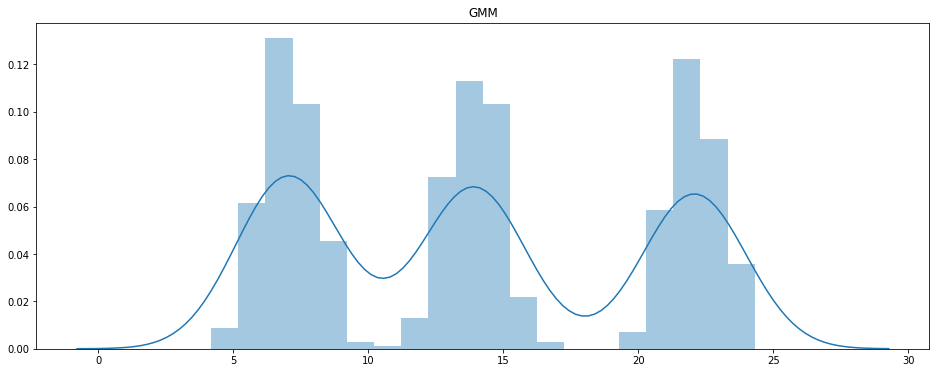

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(numbers, bins=20, hist=True)
ax.set_title('GMM')

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [23]:
g1 = norm(loc=mean1 + 3, scale=1)
g2 = norm(loc=mean2+5, scale=1)
g3 = norm(loc=mean3+7, scale=1)
weight1, weight2, weight3
weighted_numbers = g1.rvs(size=1000) * weight1 + g2.rvs(size=1000) * weight2 + g3.rvs(size=1000) * weight3
weighted_numbers.shape


(1000,)

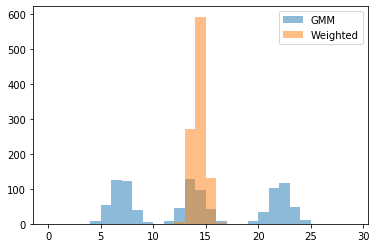

In [24]:
plt.hist(numbers, range(0, 30), alpha=0.5, label='GMM')
plt.hist(weighted_numbers, range(0, 30), alpha=0.5, label='Weighted')
plt.legend(loc='upper right')
plt.show()


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [25]:
mean = 70000
std = 30000
x = 50000
rv = norm(loc = mean, scale = std)

In [26]:
rv.cdf(x)

0.2524925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [27]:
b1 = 45000
b2 = 65000 
rv.cdf(b2) - rv.cdf(b1)

0.23148778642545326

#### 4.C
What percent of people earn more than 70,000 RCU?

In [28]:
x = 70000
1 - rv.cdf(x)

0.5

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [29]:
x = 140000
percentage = 1 - rv.cdf(x)
percentage * 1000

9.815328628645315

#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

In [245]:
# b1 = 50000
# b2 = 70000 
# rv.cdf(b2) - rv.cdf(b1)
#todo:

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [30]:
from fractions import Fraction

def calc_harmonic(n):
    return float(sum(Fraction(1, d) for d in range(1, n + 1)))

def calc_expectation_for_coupon_collector(n):
    return round(n * calc_harmonic(n), 3)


n = 100
calc_expectation_for_coupon_collector(n)

518.738

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [31]:
n = 100
def calc_coupon_variance(n):
    return round((n**2) *( float(sum(Fraction(1, d**2) for d in range(1, n + 1)))), 2)

calc_coupon_variance(n)

16349.84

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

In [32]:
from scipy.special import comb

calc_table = {}
def calc_x_prob_for_ks(total_num_of_cards, num_of_unseen_cards, rounds):
    key = tuple([total_num_of_cards, num_of_unseen_cards, rounds])
    
    if key in calc_table:
        return calc_table[key]
    
    if num_of_unseen_cards == 0:
        return 1
    
    if rounds == 0:
        return 0 
    
    seen_count = total_num_of_cards - num_of_unseen_cards
    unseen_prob = num_of_unseen_cards/total_num_of_cards
    seen_prob = seen_count/total_num_of_cards
    
    prob = np.sum([(seen_prob**(k-1)) * unseen_prob  * calc_x_prob_for_ks(total_num_of_cards, num_of_unseen_cards-1, rounds-1) for k in range(1, rounds)])
    calc_table[key] = prob
    return prob

def full_coupon_collector_prob(n, rounds):
    return calc_x_prob_for_ks(n, n-1, rounds)
    
prob_to_not_get_full = 1 - full_coupon_collector_prob(20, 40)
print('P(T_20 >40) is {}'.format(prob_to_not_get_full))

P(T_20 >40) is 0.4228871419772272


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [33]:
E = calc_expectation_for_coupon_collector(20)
'P(T_20 > 2E) = P(T_20 > {}) = {}'.format(2*E, 1/  (np.log(20) **2))

'P(T_20 > 2E) = P(T_20 > 143.91) = 0.11142791485145642'